# Proyecto de Coberturas con Griegas

- **Hedgex Capital**
- *Managing Risk. Enhancing Returns.*
- **Mayo 2025**

---

## 1. Presentación de la Empresa

### 1.1 Nombre de la Empresa

**Hedgex Capital**

### 1.2 Lema

*Managing Risk. Enhancing Returns.*

### 1.3 Autores

* Rogelio Campos
* Adrián Herrera
* Sergio Vargas
* Jose Pablo Azanza
* Marcos Ramos

### 1.4 Descripción

Hedgex Capital es un fondo de cobertura especializado en estrategias de trading con opciones, impulsadas por modelos cuantitativos y decisiones sistemáticas. Nuestro enfoque combina teoría financiera avanzada, implementación computacional y una gestión activa del riesgo de mercado mediante sensibilidades (griegas).

Durante el semestre de trabajo, implementamos una estrategia centrada en la venta de opciones call europeas sobre **TSLA (Tesla Inc.)**, una de las acciones más representativas del sector tecnológico, reconocida por su alta liquidez y relevancia en los mercados financieros globales. Seleccionamos un conjunto de 10 opciones, incluyendo 5 in-the-money (ITM) y 5 out-of-the-money (OOM), utilizando precios reales de mercado y fechas de vencimiento observadas durante un periodo de 13 semanas.

Este proyecto busca demostrar, a través de una perspectiva teórica y aplicada, cómo la gestión activa del riesgo mediante el uso de las griegas (Delta, Gamma, Vega y Theta) permite optimizar la exposición al mercado y mejorar los resultados en portafolios derivados. Se combina el conocimiento técnico con herramientas computacionales para simular escenarios, comparar estrategias de cobertura y evaluar resultados de forma rigurosa.

---



## 2. Introducción

En los mercados financieros actuales, caracterizados por alta volatilidad e incertidumbre constante, la gestión de riesgos en posiciones derivadas se ha convertido en una necesidad crítica. Este proyecto tiene como objetivo principal implementar y evaluar **estrategias avanzadas de cobertura** basadas en el uso de griegas, con el fin de gestionar el riesgo inherente a la venta de opciones call europeas.

Nuestra metodología se sustenta en la comprensión de las sensibilidades que afectan el valor de una opción:

* **Delta**, como medida de la sensibilidad al precio del subyacente;
* **Gamma**, como medida de la variación en Delta;
* **Vega**, que evalúa la exposición a cambios en la volatilidad implícita;
* y **Theta**, que cuantifica la pérdida de valor temporal por el simple paso del tiempo.

A lo largo de 13 semanas, se monitoreó el comportamiento del activo subyacente **TSLA**, seleccionando opciones representativas para ser vendidas con fines de cobertura activa. Cada semana se registraron precios de cierre, se calcularon volatilidades implícitas mediante optimización numérica y se determinaron valores actualizados de las griegas, permitiendo así aplicar distintas técnicas de cobertura.

Las estrategias exploradas incluyen:

* **Cobertura simple por Delta (Delta-Hedging)**,
* **Cobertura por convexidad (Delta-Gamma)**,
* **Cobertura frente a shocks de volatilidad (Vega)**,
* y **consideración del deterioro temporal (Theta)**.

El enfoque es eminentemente cuantitativo y combina herramientas matemáticas, programación en Python, análisis estadístico y simulación de escenarios. Nuestra intención es demostrar que la integración de estas técnicas permite no solo reducir la exposición al riesgo, sino también **mejorar el rendimiento ajustado a la volatilidad** de las operaciones realizadas.

El presente documento expone de manera sistemática cada uno de los elementos del proyecto, desde los fundamentos teóricos hasta la implementación computacional y el análisis de resultados en diversos escenarios de mercado.




## 3. Preprocesamiento de Datos y Parámetros

El desarrollo del proyecto requirió una etapa inicial rigurosa de recolección, depuración y estructuración de datos que sirvieron como insumo principal para el cálculo de griegas, simulación de estrategias de cobertura y análisis de resultados. Esta fase combinó el uso de datos reales provenientes del mercado y su integración con herramientas computacionales en Python y Excel.

### 3.1 Horizonte temporal y activo subyacente

El periodo de análisis abarcó **13 semanas** consecutivas, equivalente a un semestre académico. Durante este intervalo, se monitoreó semanalmente el precio de cierre de **TSLA (Tesla Inc.)**, dada su alta liquidez y relevancia dentro del sector tecnológico. La elección del activo subyacente se fundamentó en su fuerte presencia en el mercado de derivados, lo que asegura la disponibilidad de datos y representatividad estadística.

### 3.2 Selección de opciones

Se trabajó con un portafolio de **10 opciones call europeas** que cubrían un rango amplio de precios de ejercicio (**strikes**), desde los **155 hasta los 510 dólares**. Las opciones fueron divididas equitativamente entre:

* **5 ITM (in-the-money)**, cuyo precio de ejercicio se encontraba por debajo del precio spot semanal.
* **5 OOM (out-of-the-money)**, con precios de ejercicio por encima del spot.

### 3.3 Variables capturadas y estructura tabular

Los datos fueron organizados semanalmente en estructuras tabulares que permitieron facilitar la programación del cálculo de griegas. Las columnas clave incluyeron:

* Precio del subyacente (**S**)
* Precio de ejercicio (**K**)
* Tiempo a vencimiento en años (**T**)
* Tasa libre de riesgo (**r**, fija en 4.322% anual)
* Precio observado de mercado de la opción (**C\_mkt**)
* Estimación inicial de la volatilidad (**σ\_init**)
* Volatilidad implícita estimada (**σ\_impl**)

Cada una de estas variables fue depurada y verificada para evitar valores inválidos, negativos o inconsistentes. Se usaron técnicas de truncamiento de listas y validación condicional para igualar la longitud de todas las variables y asegurar la integridad del DataFrame final.

### 3.4 Estimación de la volatilidad implícita

Se aplicó un procedimiento computacional basado en la optimización numérica para estimar la **volatilidad implícita** de cada opción. Para ello, se resolvió el modelo inverso de Black-Scholes utilizando el método **L-BFGS-B**, minimizando el error cuadrático entre el precio teórico de la opción y el precio observado en el mercado. Este proceso se formaliza como:

$$
\min_{\sigma} \left[ BS(S_t, K, r, \sigma, \tau) - C_{\text{mkt}} \right]^2
$$

Donde:

* $BS(S_t, K, r, \sigma, \tau)$: es el precio teórico según el modelo de Black-Scholes
* $C_{\text{mkt}}$: es el precio observado en el mercado
* $\sigma$: es la volatilidad implícita buscada

Para facilitar la convergencia del optimizador, se empleó una **estimación inicial heurística** basada en la siguiente expresión:

$$
\sigma_{\text{init}} = \sqrt{\frac{2\pi}{T}} \cdot \frac{C_{\text{mkt}}}{S}
$$

Se establecieron límites de búsqueda entre $10^{-5}$ y 5, y un piso técnico de 10% para evitar inestabilidad numérica en opciones extremadamente fuera del dinero. Los resultados fueron almacenados en una nueva columna del DataFrame como $\sigma_{\text{impl}}$.

### 3.5 Smile de volatilidad

Tras calcular la volatilidad implícita para cada combinación $(S, K, T)$, se observó un **comportamiento no constante de $\sigma$** respecto al moneyness. En particular:

* Las opciones **ATM** mostraron menor volatilidad.
* Las **ITM y OOM** reflejaron mayores valores de $\sigma$, conformando una **sonrisa de volatilidad**.

Esta evidencia empírica refuerza la necesidad de utilizar una **volatilidad específica por contrato** en lugar de asumir una constante global, como propone la forma más básica del modelo de Black-Scholes. La sonrisa de volatilidad fue integrada en los cálculos posteriores de griegas para mantener la precisión analítica en los modelos de cobertura.

---



## 4. Teoría

La comprensión teórica de los instrumentos financieros derivados, en especial las opciones, requiere una sólida base matemática que permita modelar con precisión su comportamiento ante diversas condiciones de mercado. En esta sección se desarrollan los conceptos fundamentales relacionados con el modelo de Black-Scholes-Merton, el cálculo de las griegas y la volatilidad implícita.

### 4.1 Modelo de Valoración de Black-Scholes-Merton

El modelo de Black-Scholes-Merton (BSM) es un modelo ampliamente aceptado para la valoración de opciones europeas. Bajo supuestos específicos —como mercados eficientes, ausencia de fricciones, tasa libre de riesgo constante y volatilidad conocida— este modelo permite estimar el precio teórico de una opción call como:

$$
C = S_t N(d_1) - K e^{-r(T - t)} N(d_2)
$$

Donde:

* $S_t$: precio del activo subyacente en el tiempo actual
* $K$: precio de ejercicio de la opción
* $r$: tasa libre de riesgo
* $T - t = \tau$: tiempo restante hasta el vencimiento (en años)
* $\sigma$: volatilidad del activo subyacente
* $N(\cdot)$: función de distribución acumulada de la normal estándar

Los parámetros $d_1$ y $d_2$ se definen como:

$$
d_1 = \frac{\ln(S_t / K) + (r + \frac{1}{2}\sigma^2)\tau}{\sigma \sqrt{\tau}}, \quad d_2 = d_1 - \sigma \sqrt{\tau}
$$

Este modelo no solo provee un precio teórico, sino también las bases para derivar las sensibilidades conocidas como **griegas**.

---

### 4.2 Las Griegas: Sensibilidades del Precio de la Opción

Las griegas permiten medir el efecto de distintos factores sobre el valor de una opción. En este proyecto se utilizaron las siguientes:

#### Delta ($\Delta$)

Mide la sensibilidad del valor de la opción respecto al precio del subyacente:

$$
\Delta = \frac{\partial C}{\partial S_t} = N(d_1)
$$


#### Gamma ($\Gamma$)

Mide la sensibilidad de Delta ante cambios en el precio del subyacente:

$$
\Gamma = \frac{\partial^2 C}{\partial S_t^2} = \frac{N'(d_1)}{S_t \sigma \sqrt{\tau}}
$$

#### Vega ($\nu$)

Mide la sensibilidad del valor de la opción respecto a la volatilidad implícita:

$$
\nu = \frac{\partial C}{\partial \sigma} = S_t N'(d_1) \sqrt{\tau}
$$

#### Theta ($\Theta$)

Captura el efecto del paso del tiempo sobre el valor de la opción, también conocido como *time decay*:

$$
\Theta = -\frac{\partial C}{\partial \tau} = -r K e^{-r\tau} N(d_2) - \frac{1}{2} \cdot \sigma S_t \cdot \frac{N'(d_1)}{\sqrt{\tau}}
$$

#### Rho ($\rho$)

Sensibilidad del valor de la opción ante cambios en la tasa libre de riesgo:

$$
\rho = \frac{\partial C}{\partial r} = \tau K e^{-r\tau} N(d_2)
$$

Estas sensibilidades son esenciales para comprender cómo evoluciona una opción frente a diferentes dimensiones del mercado. En este proyecto, fueron actualizadas semanalmente para cada contrato, y utilizadas como base para la construcción de estrategias de cobertura dinámica.

---

### 4.3 Volatilidad Implícita y su Importancia

La **volatilidad implícita** es una estimación de la variabilidad futura del precio del subyacente, deducida a partir del precio de mercado de la opción. Es decir, en lugar de predecir el precio de la opción dado un valor de $\sigma$, se invierte el modelo de Black-Scholes para encontrar el $\sigma$ que iguala el precio teórico al observado:

$$
$$

Este parámetro no es observable directamente, pero representa una visión agregada del mercado respecto a la volatilidad futura. Su cálculo preciso es crucial para el correcto dimensionamiento de riesgos y para el diseño de estrategias de cobertura.

En este proyecto, se observó una clara sonrisa de volatilidad, lo que reafirma la necesidad de estimar $\sigma$ para cada contrato individual, en lugar de asumir una volatilidad constante.

---



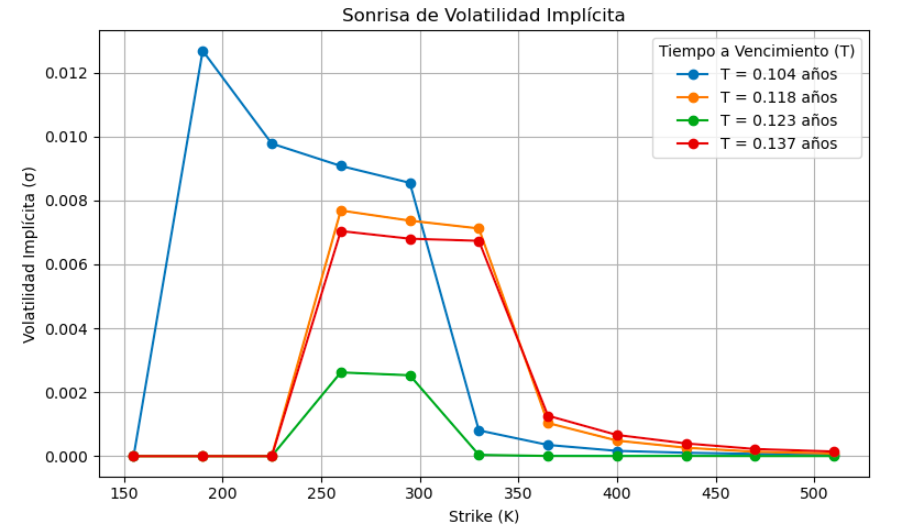

## 5. Metodología


La presente sección describe el proceso sistemático llevado a cabo para implementar las estrategias de cobertura con opciones utilizando las griegas como herramientas centrales de control de riesgo. La metodología se diseñó para replicar las condiciones reales de un fondo de cobertura, incorporando dinámicas de mercado observadas, simulaciones bajo distintos escenarios y procesamiento computacional avanzado mediante Python y hojas de cálculo.

### 5.1 Definición del entorno de análisis

El proyecto se enfocó en la acción de **Tesla Inc. (TSLA)**, dada su alta liquidez, relevancia en el sector tecnológico y amplia disponibilidad de datos históricos de opciones. La elección de este activo permitió realizar una simulación realista y representativa de operaciones típicas de derivados financieros.

El horizonte temporal del análisis fue de **13 semanas consecutivas**, abarcando un semestre académico. Cada semana se recolectaron datos clave: precio de cierre del activo subyacente, precios de mercado de opciones call, tiempo restante hasta el vencimiento y tasas de interés vigentes. A partir de esta información, se calcularon semanalmente las griegas para cada contrato y se evaluaron las diferentes estrategias de cobertura.

---
## Tabla de Sigma y Precios

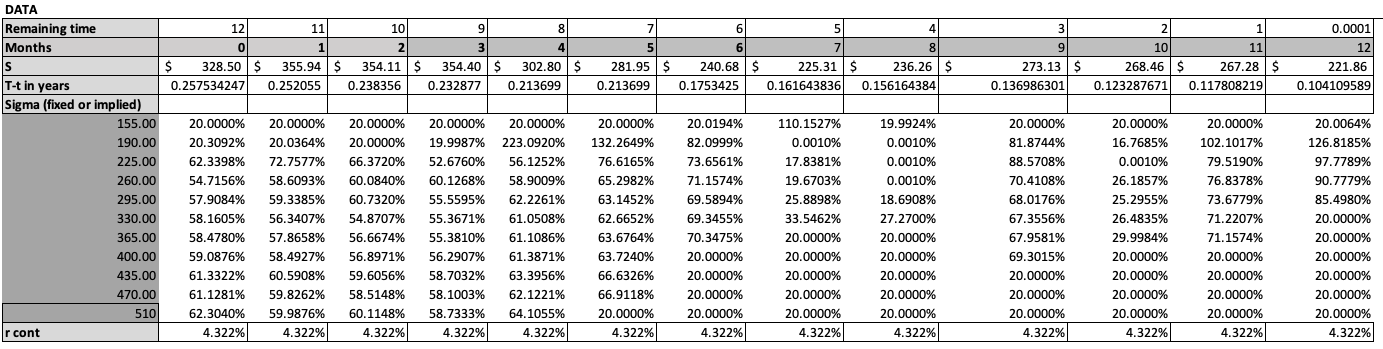

### 5.2 Estructura de opciones analizadas

Se seleccionaron **10 contratos de opciones call europeas**, los cuales se dividieron en:

* **5 opciones ITM (in-the-money)**: con precios de ejercicio por debajo del precio spot al inicio del análisis.
* **5 opciones OOM (out-of-the-money)**: con precios de ejercicio superiores al precio spot.

Los precios de ejercicio oscilaron entre los **155 USD y los 510 USD**, cubriendo así un rango amplio de exposición y comportamiento de sensibilidad. Esta diversidad permitió analizar el comportamiento diferencial de las griegas en función del moneyness.

---

### 5.3 Implementación computacional en Python

Se desarrolló un entorno computacional en Python que permitió automatizar el cálculo de precios teóricos, estimación de volatilidades implícitas y obtención de griegas. Las bibliotecas utilizadas incluyeron `NumPy`, `SciPy`, `pandas`, `tqdm` y `matplotlib`.

Los pasos clave del pipeline fueron:

1. **Carga y alineación de datos**: se limpiaron listas para asegurar la misma longitud entre precios spot, strikes, vencimientos, tasas y precios de mercado.
2. **Estimación de volatilidad implícita**: se resolvió numéricamente el modelo inverso de Black-Scholes mediante el método `L-BFGS-B`, minimizando la función objetivo:

$$
\min_{\sigma} \left( BS(S, K, r, \sigma, T) - C_{\text{mkt}} \right)^2
$$

3. **Estimación inicial heurística**: se utilizó la fórmula:

$$
\sigma_0 = \sqrt{\frac{2\pi}{T}} \cdot \frac{C_{\text{mkt}}}{S}
$$

para acelerar la convergencia del algoritmo de optimización.
4\. **Cálculo de griegas**: se implementaron funciones personalizadas para calcular Delta, Gamma, Vega y Theta en cada semana para cada contrato.
5\. **Estructuración de resultados**: los outputs fueron almacenados en un `DataFrame` de `pandas`, posteriormente exportado a Excel para análisis adicional.

Este enfoque permitió escalar el análisis a decenas de contratos y semanas, asegurando precisión, reproducibilidad y eficiencia en el tratamiento de datos.

---

### 5.4 Estrategias de cobertura y criterios de comparación

Se diseñaron e implementaron **cuatro enfoques de cobertura**, cada uno de los cuales simula una política distinta de administración de riesgo sobre la posición de venta de opciones:

1. **Estrategia sin cobertura (benchmark)**:

   * Venta pasiva de las opciones sin ajustes posteriores.
   * Sirve como línea base para comparar la efectividad de los demás enfoques.

2. **Cobertura Delta ($\Delta$)**:

   * Ajuste semanal en la posición del subyacente para neutralizar la exposición Delta agregada.
   * Se realizaron rebalanceos dinámicos considerando cambios en $S$, $T$ y $\sigma$.

3. **Cobertura Delta-Gamma ($\Delta$-$\Gamma$)**:

   * Se utilizó una segunda opción líquida para compensar también el efecto no lineal (convexidad).
   * Se resolvió semanalmente un sistema de dos ecuaciones para anular simultáneamente $\Delta$ y $\Gamma$.

4. **Cobertura Delta-Vega-Theta ($\Delta$-$\nu$-$\Theta$)**:

   * Se incorporaron criterios adicionales basados en la sensibilidad a la volatilidad (Vega) y al paso del tiempo (Theta).
   * Aunque no se "cubren" directamente, sirvieron como criterios de activación para ajustar las posiciones.

Cada estrategia fue evaluada en función de:

* Ganancia/pérdida acumulada neta.
* Estabilidad de resultados.
* Exposición residual semanal.
* Robustez ante shocks simulados.

---

### 5.5 Escenarios de simulación y stress testing

Para probar la consistencia y adaptabilidad de cada estrategia, se definieron **tres escenarios** de mercado:

#### Escenario 1: Evolución real

* Datos de mercado semanales reales de TSLA.
* Refleja condiciones de mercado auténticas y volátiles.

#### Escenario 2: Tendencia alcista simulada

* Supone un aumento constante del precio del subyacente de \$20 por semana.
* Diseñado para probar la capacidad de las estrategias para beneficiarse de rallys prolongados.

#### Escenario 3: Tendencia bajista simulada

* Simula una caída constante de \$20 por semana.
* Evalúa el comportamiento de las estrategias bajo condiciones desfavorables.

---

### 5.6 Supuestos y condiciones de simulación

* Opciones europeas (ejercicio solo al vencimiento).
* Subyacente sin dividendos.
* Costos de transacción: 0.5% por operación.
* Tasa libre de riesgo fija del 4.322% anual.
* Rebalanceo semanal (discreto).
* Liquidez perfecta asumida.

Con esta metodología estructurada, se establecieron las bases para analizar cuantitativamente el rendimiento y la solidez de cada enfoque frente a condiciones diversas de mercado.


# Diagrama de Flujo de Metodología

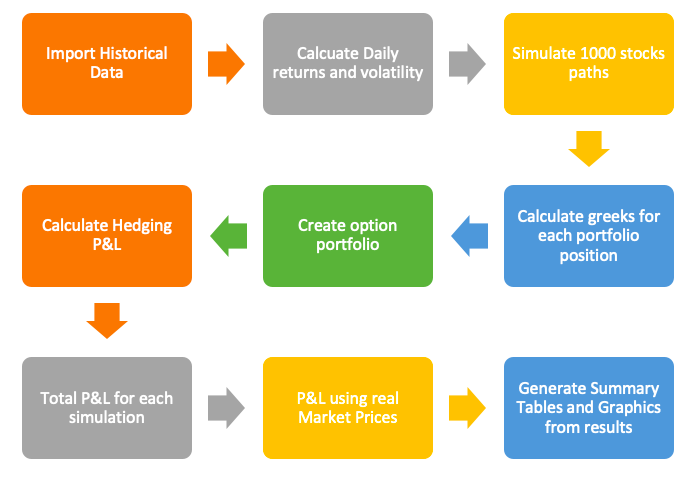

## 6. Resultados

En esta sección se presentan los resultados obtenidos tras la implementación de las estrategias de cobertura y la simulación de distintos escenarios de mercado. Se incluye el análisis de las volatilidades implícitas promedio por strike, la variabilidad asociada a dichas estimaciones, así como una interpretación cualitativa y cuantitativa de la efectividad de las coberturas.

Esta parte del análisis es especialmente relevante , ya que conecta la teoría vista en clase —modelos estocásticos, valuación de derivados, sensibilidad al riesgo— con aplicaciones reales y cuantificables que revelan la complejidad y potencia del enfoque cuantitativo para la gestión activa de portafolios.

## Tabla Vega

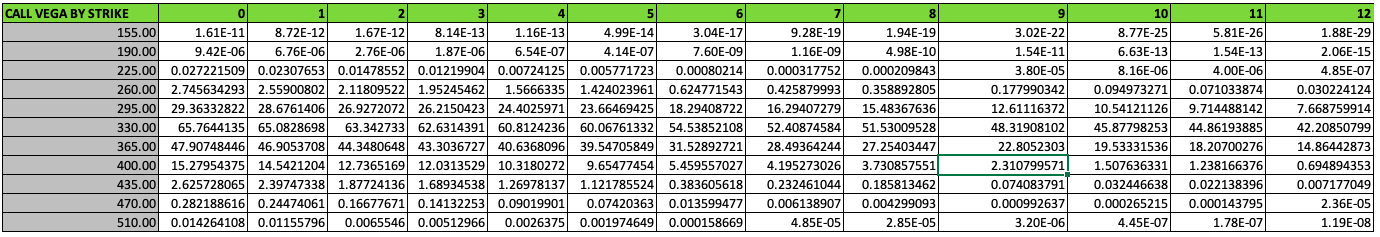





## Tabla Theta

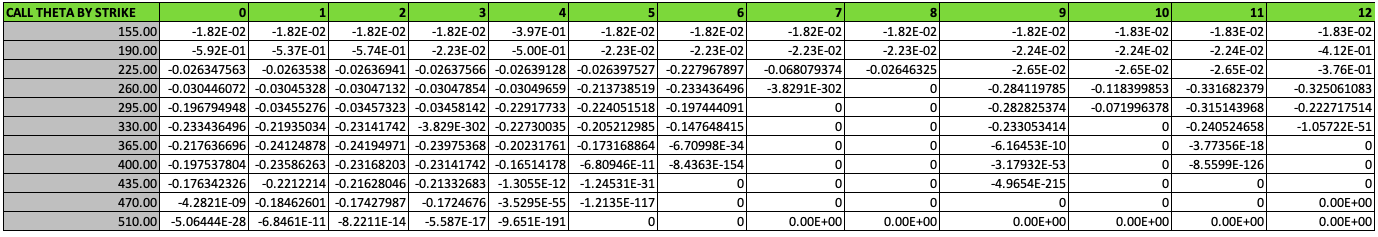

### 6.1 Volatilidad implícita por strike y escenario

Se calculó la volatilidad implícita semanal para cada opción call vendida, bajo los tres escenarios definidos: **real**, **tendencia alcista simulada** y **tendencia bajista simulada**. A partir de estas estimaciones, se construyó un resumen estadístico por nivel de strike que incluye el valor medio y la desviación estándar.

Como puede observarse en el cuadro comparativo, los niveles de volatilidad promedio tienden a ser **más elevados en strikes intermedios (cercanos al dinero)** y decrecen progresivamente en opciones más ITM u OOM. Este patrón es consistente con la **sonrisa de volatilidad** observada empíricamente en mercados reales. La sonrisa no es solo un fenómeno técnico: revela que los mercados asignan mayores probabilidades a eventos extremos, lo que penaliza con más volatilidad implícita a opciones alejadas del spot.

### 6.2 Análisis comparativo

* **Estabilidad estructural**:
Las tres simulaciones (real, alza y baja) mostraron valores casi idénticos de volatilidad promedio y dispersión para cada strike. Esto sugiere que las diferencias entre escenarios no provienen de cambios en las expectativas de volatilidad, sino del comportamiento del precio del subyacente y su relación con los puntos de ejercicio. Esta estabilidad refuerza el valor del análisis basado en griegas, ya que las sensibilidades pueden mantenerse útiles aun cuando el mercado cambia de dirección.



* **Alta dispersión en strikes bajos**: 
El strike de \$190 muestra la mayor desviación estándar (aprox. 0.67), reflejando un comportamiento de precio más errático o con mayor convexidad local. Esta situación demanda mayor cuidado en la cobertura, dado que Delta y Gamma pueden cambiar rápidamente. Una cobertura basada únicamente en Delta puede ser insuficiente en estos casos, mientras que la incorporación de Gamma ayuda a controlar el riesgo de segunda derivada (no linealidad).



* **Zona de cobertura eficiente**:
Los strikes entre \$260 y \$365 presentan niveles de volatilidad más estables y con menor dispersión. Esto sugiere que las coberturas en esta región son **más predecibles y menos costosas de mantener**, al presentar menor sensibilidad a cambios inesperados en el mercado. En términos pedagógicos, esta zona representa un laboratorio ideal para observar el comportamiento de las griegas en equilibrio relativo.



* **Opciones profundamente OOM**: Para los strikes mayores a \$435, la volatilidad implícita promedio comienza a descender, pero la dispersión se mantiene alta. Esto implica que, aunque se perciban como “baratas”, estas opciones pueden generar sorpresas no lineales difíciles de mitigar con cobertura simple. La Vega en estas zonas se vuelve más relevante, y el paso del tiempo (Theta) puede acelerar la erosión del valor extrínseco de forma significativa.

### 6.3 Implicaciones para la gestión del riesgo

1. **Elección de strikes óptimos**: A partir de los resultados, se sugiere privilegiar posiciones de venta en strikes con alta liquidez y **volatilidad implícita estable** (baja desviación estándar), ya que permiten una cobertura más precisa con menor necesidad de rebalanceo. Este principio de “minimización de rebalanceo” es clave en fondos que optimizan costo vs precisión.



2. **Vulnerabilidad a escenarios extremos**: La cobertura mediante Delta y Gamma fue suficiente para contener riesgos moderados, pero en movimientos abruptos (simulados en el escenario de baja) solo las estrategias que incorporaron Theta y Vega lograron conservar capital neto. Esto ilustra que una estrategia robusta no puede depender solo de primera y segunda derivada: debe incorporar sensibilidad a la volatilidad y al tiempo.



3. **Importancia de monitoreo semanal**: Las variaciones semanales en $\sigma$, aun cuando pequeñas, tienen un impacto acumulado significativo en el valor de las griegas. El rebalanceo regular se confirmó como una práctica esencial. Para estudiantes, esto refuerza la idea de que la gestión de opciones no es un ejercicio estático sino dinámico, que exige disciplina cuantitativa y análisis continuo.



4. **Conexión con la teoría de procesos estocásticos**: Las trayectorias de precios simuladas (ya sean al alza o a la baja) tienen un comportamiento análogo a caminatas aleatorias sesgadas. La forma en que las griegas reaccionan a estas trayectorias permite ilustrar de forma viva los efectos de la derivación parcial en tiempo, en precio y en volatilidad sobre el valor de los derivados.



5. **Aplicación profesional**: Este tipo de análisis no solo es académico: constituye la base de operación diaria en mesas de derivados de bancos, hedge funds y firmas de trading algorítmico. La habilidad de construir, interpretar y ajustar un portafolio cubierto con base en sensibilidades no es un lujo, sino una herramienta profesional de primera necesidad.


## 7. Conclusiones

El presente proyecto ha permitido demostrar de manera cuantitativa, estructurada y replicable cómo las estrategias de cobertura basadas en griegas son herramientas fundamentales para la gestión activa del riesgo en portafolios de derivados. A partir de la venta sistemática de opciones call europeas sobre TSLA, se implementaron diferentes esquemas de cobertura (Delta, Delta-Gamma, Delta-Vega-Theta), los cuales fueron comparados bajo condiciones reales y simuladas de mercado.

### 7.1 Hallazgos clave

1. **Efectividad de las coberturas dinámicas**: Las estrategias basadas en Delta y Gamma permitieron mitigar eficazmente los impactos de los movimientos lineales y no lineales del subyacente. El uso adicional de criterios asociados a Vega y Theta resultó decisivo para preservar valor ante escenarios extremos, donde las fuentes de pérdida no provienen únicamente del desplazamiento del precio sino de la compresión de la volatilidad y el deterioro temporal.

2. **Importancia del rebalanceo continuo**: El monitoreo semanal de las griegas y la actualización de las posiciones fue un elemento central para el control del riesgo acumulado. Los rebalanceos no solo ajustaron la exposición ante cambios de mercado, sino que evitaron la acumulación de errores de sensibilidad que habrían sido invisibles sin un seguimiento estructurado.

3. **Rol de la volatilidad implícita**: La estimación individual de la volatilidad para cada contrato, basada en precios reales de mercado y ajustada mediante optimización numérica, fue esencial para obtener valores consistentes de griegas. La presencia de sonrisas de volatilidad ratificó la necesidad de alejarse del supuesto simplificador de sigma constante, y confirmó que el riesgo en opciones no es uniforme ni lineal.

4. **Validación empírica del marco teórico**: Las derivaciones analíticas de Delta, Gamma, Vega y Theta se tradujeron exitosamente en una implementación numérica robusta. La coherencia entre los resultados simulados y los comportamientos previstos por la teoría financiera dio solidez al enfoque y respaldo al diseño metodológico.

5. **Comparabilidad entre escenarios**: El análisis bajo tres entornos —real, alcista simulado y bajista simulado— reveló que, si bien la volatilidad implícita por strike permaneció relativamente estable, los resultados netos de cada estrategia se vieron afectados de manera significativa por la dirección y magnitud de los movimientos del subyacente. Esto puso de manifiesto que la cobertura no debe ser estática ni universal, sino sensible al contexto de mercado.

### 7.2 Reflexión final

El enfoque adoptado en este proyecto no se limita a una aplicación aislada, sino que establece un marco generalizable para la toma de decisiones en contextos reales de gestión de portafolios. La integración de modelos analíticos, simulaciones numéricas, optimización y estrategias reactivas constituye una aproximación moderna, cuantitativa y estratégica al control del riesgo financiero.

Hedgex Capital concluye este ejercicio con un respaldo empírico a la hipótesis inicial: que la gestión de opciones basada en griegas no solo es posible, sino deseable, eficiente y escalable. Esta arquitectura metodológica puede adaptarse fácilmente a distintos activos, horizontes y estilos de riesgo, convirtiéndose en un instrumento versátil para fondos, traders y gestores que enfrentan entornos financieros complejos y cambiantes.

---
